In [53]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialization

In [54]:
# Initialize the Taxi-v3 environment with 'ansi' render mode
env = gym.make('Taxi-v3', render_mode='ansi')

# Initialize Q-tables
q_table = np.zeros([env.observation_space.n, env.action_space.n])  # 500, 6  
# There are 500 discrete states since there are 25 taxi positions, 
# 5 possible locations of the passenger (including the case when the passenger is in the taxi), 
# and 4 destination locations. 

sarsa_q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Function to choose action using epsilon-greedy policy
def choose_action(state, q_table):
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore action space
    else:
        return np.argmax(q_table[state])  # Exploit learned values

# Q-learning algorithm

In [55]:
q_learning_rewards = []
q_learning_steps = []

# Parameters
alpha = 0.8  # Learning rate
gamma = 1  # Discount factor
epsilon = 0.1  # Exploration factor
episodes = 2000

for episode in range(episodes):
    state = env.reset()
    # print(env.render())
    if isinstance(state, tuple):
        state = state[0]
    done = False
    total_rewards = 0
    steps = 0

    while not done:
        action = choose_action(state, q_table)
        # print('action:', action, end = '  ')
        result = env.step(action)
        # print('result:', result)
        next_state, reward, done = result[:3] # Unpack only the necessary values
        # if the action invalid, the next_state = state
        # if task finished, done = True

        # Update Q-table
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state
        total_rewards += reward
        steps += 1
    # sys.exit()

    q_learning_rewards.append(total_rewards)
    print(steps, total_rewards)
    # print('Episode {}: Total Reward: {}'.format(episode, total_rewards))
    q_learning_steps.append(steps)

np.save("q_table.npy", q_table)



843 -1983
1016 -2453
200 -521
1107 -2571
304 -724
524 -890
87 -84
881 -1967
689 -1217
670 -1000
168 -183
492 -561
501 -606
177 -201
176 -173
678 -1206
436 -577
183 -216
95 -83
100 -115
143 -131
58 -46
194 -254
54 -42
414 -744
32 -29
98 -95
129 -162
34 -31
237 -270
297 -420
50 -47
49 -46
81 -105
245 -269
218 -269
77 -74
71 -59
85 -145
35 -23
209 -278
7 14
77 -56
57 -99
234 -276
163 -277
117 -123
118 -124
116 -140
138 -153
109 -133
50 -29
84 -99
152 -158
8 13
120 -144
248 -308
16 5
29 -26
152 -158
29 -17
88 -76
87 -75
159 -318
39 -27
27 -15
27 -15
27 -42
13 -1
104 -254
44 -32
47 -35
30 -45
22 -1
72 -78
126 -132
7 14
33 -21
10 11
268 -337
118 -187
29 -26
174 -261
17 4
21 -27
23 -11
12 0
67 -136
22 -10
38 -62
59 -92
8 13
21 0
42 -57
74 -62
36 -15
57 -81
18 -6
73 -115
44 -50
13 8
22 -1
31 -19
283 -379
10 11
18 3
21 0
28 -25
55 -70
15 -3
13 -1
15 6
89 -131
76 -73
60 -147
48 -36
40 -37
109 -133
29 -8
34 -13
20 -26
7 14
11 10
20 1
97 -112
15 -3
13 8
76 -73
11 1
13 8
15 6
19 -16
15 -12
30 -9
10

# SARSA algorithm

In [56]:
sarsa_rewards = []
sarsa_steps = []

# Parameters
alpha = 0.4  # Learning rate
gamma = 1 # Discount factor
epsilon = 0.01  # Exploration factor
episodes = 2000

for episode in range(episodes):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    done = False
    total_rewards = 0
    steps = 0

    while not done:
        action = choose_action(state, sarsa_q_table)
        result = env.step(action)
        next_state, reward, done = result[:3]  # Unpack only the necessary values
        # if isinstance(next_state, tuple):
        #     next_state = next_state[0]
        next_action = choose_action(next_state, sarsa_q_table)

        # Update Q-table using SARSA formula
        old_value = sarsa_q_table[state, action]
        next_value = sarsa_q_table[next_state, next_action]
        sarsa_q_table[state, action] = old_value + alpha * (reward + gamma * next_value - old_value)

        state = next_state
        action = next_action
        total_rewards += reward
        steps += 1

    sarsa_rewards.append(total_rewards)
    print(steps, total_rewards)
    sarsa_steps.append(steps)

np.save("sarsa_q_table.npy", sarsa_q_table)


515 -1196
601 -1444
986 -1595
556 -1219
859 -1927
89 -68
1087 -2335
314 -302
740 -1169
290 -278
425 -890
452 -440
529 -949
272 -251
348 -327
795 -1260
170 -149
370 -358
222 -210
129 -108
319 -307
419 -416
336 -333
57 -36
220 -208
242 -221
581 -578
320 -695
175 -226
247 -235
194 -173
171 -150
208 -196
251 -239
391 -811
123 -102
98 -77
188 -176
96 -174
159 -147
243 -618
50 -29
108 -87
188 -185
66 -45
125 -104
187 -220
115 -346
183 -351
178 -157
143 -140
18 3
246 -567
88 -175
146 -386
165 -504
228 -234
6 15
131 -110
62 -113
138 -135
70 -76
275 -551
152 -158
28 -7
87 -66
70 -103
73 -61
170 -194
42 -21
24 -3
55 -43
49 -37
6 15
69 -165
150 -255
155 -134
97 -85
152 -140
152 -482
22 -10
149 -155
97 -202
21 -27
135 -114
113 -182
173 -161
33 -48
11 10
56 -44
184 -163
72 -87
121 -109
151 -130
127 -106
107 -104
8 13
7 14
62 -59
72 -51
110 -89
25 -22
35 -14
130 -118
149 -137
85 -181
49 -28
70 -85
165 -189
213 -399
69 -48
10 11
51 -66
147 -126
62 -41
70 -58
22 -1
93 -153
15 6
32 -11
119 -98
51 -30
7

# Plotting the results

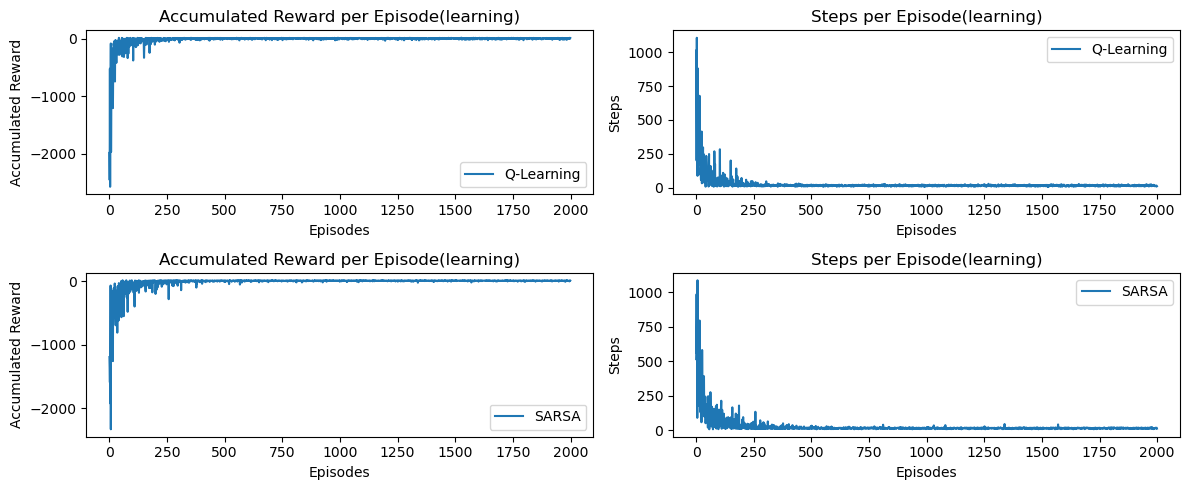

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.plot(range(episodes), q_learning_rewards, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Accumulated Reward per Episode(learning)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(episodes), q_learning_steps, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Steps per Episode(learning)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(episodes), sarsa_rewards, label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.title('Accumulated Reward per Episode(learning)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(episodes), sarsa_steps, label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Steps')
plt.title('Steps per Episode(learning)')
plt.legend()

plt.tight_layout()
plt.show()

In [58]:
# Testing the trained agent
def test_agent(env, q_table, episodes=10000):
    total_rewards = 0
    total_steps = 0

    for episode in range(episodes):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]
        done = False
        episode_rewards = 0
        episode_steps = 0

        while not done:
            action = np.argmax(q_table[state])  # greedy algorithm
            result = env.step(action)
            state, reward, done, _ = result[:4]  # Unpack only the necessary values
            if isinstance(state, tuple):
                state = state[0]
            episode_rewards += reward
            episode_steps += 1

            if episode_steps >= 100:  # Limit the number of steps per episode
                break

        total_rewards += episode_rewards
        total_steps += episode_steps

    avg_rewards = total_rewards / episodes
    avg_steps = total_steps / episodes
    return avg_rewards, avg_steps


avg_q_rewards, avg_q_steps = test_agent(env, q_table)
avg_sarsa_rewards, avg_sarsa_steps = test_agent(env, sarsa_q_table)

print(f"Q-learning: Avg Rewards = {avg_q_rewards}, Avg Steps = {avg_q_steps}")
print(f"SARSA: Avg Rewards = {avg_sarsa_rewards}, Avg Steps = {avg_sarsa_steps}")

Q-learning: Avg Rewards = 7.7946, Avg Steps = 13.2054
SARSA: Avg Rewards = 7.5983, Avg Steps = 13.4017


# Visualization function for the trained agent

In [59]:
def visualize_agent(env, q_table, max_steps=100):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    done = False
    steps = 0
    total_reward = 0

    while not done and steps < max_steps:
        action = np.argmax(q_table[state])
        result = env.step(action)
        next_state, reward, done= result[:3]  # Unpack only the necessary values
        if isinstance(next_state, tuple):
            next_state = next_state[0]
        rendered_env = env.render()
        print(rendered_env)
        print(f"Step: {steps + 1}, Action: {action}, Reward: {reward}")
        state = next_state
        total_reward += reward
        steps += 1

    print(f"Total Reward: {total_reward}")


# Visualize the trained Q-learning agent.................................................................................................................................................
print("Visualizing Q-learning agent:")
visualize_agent(env, q_table)

# Visualize the trained SARSA agent
print("Visualizing SARSA agent:")
visualize_agent(env, sarsa_q_table)


Visualizing Q-learning agent:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 1, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step: 2, Action: 3, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 3, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step: 4, Action: 1, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step: 5, Action: 3, Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step: 6, Action: 4, Reward: -1
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step: 7, Action: 0, Reward: -1
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (So

Interview

In [60]:
import gym
import numpy as np
env = gym.make('Taxi-v3')
load_q_table_path = 'q_table.npy'
load_sarsa_q_table_path = 'sarsa_q_table.npy'
q_table = np.load(load_q_table_path)
sarsa_q_table = np.load(load_sarsa_q_table_path)

# Testing the trained agent
def test_agent(env, q_table, episodes=100):
    total_rewards = 0
    total_steps = 0

    for episode in range(episodes):
        state = env.reset()
        if isinstance(state, tuple):
            state = state[0]
        done = False
        episode_rewards = 0
        episode_steps = 0

        while not done:
            action = np.argmax(q_table[state])  # greedy algorithm
            result = env.step(action)
            state, reward, done, _ = result[:4]  # Unpack only the necessary values
            print(":", state, reward, done)
            if isinstance(state, tuple):
                state = state[0]
            episode_rewards += reward
            episode_steps += 1

            if episode_steps >= 100:  # Limit the number of steps per episode
                break

        total_rewards += episode_rewards
        total_steps += episode_steps

    avg_rewards = total_rewards / episodes
    avg_steps = total_steps / episodes
    return avg_rewards, avg_steps


avg_q_rewards, avg_q_steps = test_agent(env, q_table)
avg_sarsa_rewards, avg_sarsa_steps = test_agent(env, sarsa_q_table)

print(f"Q-learning: Avg Rewards = {avg_q_rewards}, Avg Steps = {avg_q_steps}")
print(f"SARSA: Avg Rewards = {avg_sarsa_rewards}, Avg Steps = {avg_sarsa_steps}")

: 374 -1 False
: 474 -1 False
: 478 -1 False
: 378 -1 False
: 278 -1 False
: 258 -1 False
: 238 -1 False
: 218 -1 False
: 318 -1 False
: 418 -1 False
: 410 20 True
: 103 -1 False
: 3 -1 False
: 19 -1 False
: 119 -1 False
: 219 -1 False
: 239 -1 False
: 259 -1 False
: 279 -1 False
: 379 -1 False
: 479 -1 False
: 475 20 True
: 227 -1 False
: 247 -1 False
: 267 -1 False
: 167 -1 False
: 187 -1 False
: 87 -1 False
: 99 -1 False
: 79 -1 False
: 179 -1 False
: 279 -1 False
: 379 -1 False
: 479 -1 False
: 475 20 True
: 232 -1 False
: 252 -1 False
: 272 -1 False
: 372 -1 False
: 472 -1 False
: 476 -1 False
: 376 -1 False
: 276 -1 False
: 256 -1 False
: 236 -1 False
: 136 -1 False
: 116 -1 False
: 16 -1 False
: 0 20 True
: 229 -1 False
: 209 -1 False
: 309 -1 False
: 409 -1 False
: 417 -1 False
: 317 -1 False
: 217 -1 False
: 237 -1 False
: 257 -1 False
: 277 -1 False
: 177 -1 False
: 77 -1 False
: 97 -1 False
: 85 20 True
: 254 -1 False
: 274 -1 False
: 374 -1 False
: 474 -1 False
: 478 -1 Fal